In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/matches.csv')

In [3]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

## Let's count the remaining teams for every stage/season/cup

In [5]:
compdates = df[['season','competition','date','homeTeam','awayTeam','phase']]

In [6]:
compdates

,season,competition,date,homeTeam,awayTeam,phase
0,1965-66,CWC,1966-04-14,Celtic,Liverpool,semi-finals
1,1955-58,ICFC,1955-06-04,Basel XI,London XI,group stage
2,1955-56,UCL,1955-09-04,Sporting CP,Partizan,first round
3,1955-56,UCL,1955-09-07,Vörös Lobogó,Anderlecht,first round
4,1955-56,UCL,1955-09-08,Servette,Real Madrid,first round
...,...,...,...,...,...,...
27175,2024-25,UECL,2024-08-15,Zrinjski Mostar,Botev Plovdiv,third qualifying round
27176,2024-25,UECL,2024-08-15,Baník Ostrava,Copenhagen,third qualifying round
27177,2024-25,EL,2024-08-15,Viktoria Plzeň,Kryvbas Kryvyi Rih,third qualifying round
27178,1965-66,UCL,NaT,Derry City,Anderlecht,first round


In [7]:
first_match = pd.DataFrame(compdates.groupby(['season','competition','phase'])['date'].min()).reset_index()
first_match

,season,competition,phase,date
0,1955-56,UCL,final,1956-06-13
1,1955-56,UCL,first round,1955-09-04
2,1955-56,UCL,quarter-finals,1955-11-23
3,1955-56,UCL,semi-finals,1956-04-04
4,1955-58,ICFC,group stage,1955-06-04
...,...,...,...,...
1175,2024-25,UCL,second qualifying round,2024-07-23
1176,2024-25,UCL,third qualifying round,2024-08-06
1177,2024-25,UECL,first qualifying round,2024-07-10
1178,2024-25,UECL,second qualifying round,2024-07-23


In [8]:
def remaining_phases(row):
    return df[(df['date'] >= row['date']) & (df['competition'] == row['competition']) & (df['season'] == row['season'])]['phase'].drop_duplicates().to_list()

In [9]:
first_match['remaining_phases'] = first_match.apply(lambda x: remaining_phases(x), axis=1)

In [10]:
first_match

,season,competition,phase,date,remaining_phases
0,1955-56,UCL,final,1956-06-13,[final]
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]"
2,1955-56,UCL,quarter-finals,1955-11-23,"[first round, quarter-finals, semi-finals, final]"
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]"
4,1955-58,ICFC,group stage,1955-06-04,"[group stage, knockout stage]"
...,...,...,...,...,...
1175,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"
1176,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round]
1177,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou..."
1178,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]"


In [11]:
def remaining_teams(row):
    rem_phases = row['remaining_phases']
    remaining_teams = []
    for r in rem_phases:
        ht = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['homeTeam'].drop_duplicates().to_list()
        at = df[(df['competition'] == row['competition']) & (df['season'] == row['season']) & (df['phase'] == r)]['awayTeam'].drop_duplicates().to_list()
        remaining_teams = remaining_teams + ht + at
    return list(set(remaining_teams))

In [12]:
first_match['remaining_teams'] = first_match.apply(lambda x: remaining_teams(x), axis=1)

In [13]:
first_match.sample(20)

,season,competition,phase,date,remaining_phases,remaining_teams
963,2014-15,EL,third qualifying round,2014-07-31,"[third qualifying round, play-off round, group...","[Wolfsburg, Aberdeen, Karabükspor, Sporting CP..."
935,2012-13,UCL,third qualifying round,2012-07-31,"[third qualifying round, play-off round, group...","[Partizan, Juventus, Dynamo Kyiv, Real Madrid,..."
675,1998-99,Intertoto,semi-finals,1999-07-28,"[semi-finals, finals]","[Heerenveen, Juventus, Montpellier, Metz, West..."
595,1995-96,CWC,quarter-finals,1996-03-07,"[quarter-finals, semi-finals, final]","[Feyenoord, Borussia Mönchengladbach, Dynamo M..."
708,2000-01,UCL,final,2001-05-23,[final],"[Valencia, Bayern Munich]"
821,2006-07,Intertoto,first round,2007-06-23,"[first round, second round, third round]","[Honka, Gent, TVMK, Zagreb, Birkirkara, Grbalj..."
108,1965-66,ICFC,third round,1966-01-26,"[third round, quarter-finals, semi-finals]","[Leeds United, Espanyol, Real Zaragoza, Chelse..."
302,1977-78,UCL,semi-finals,1978-03-29,"[semi-finals, final]","[Liverpool, Juventus, Club Brugge, Borussia Mö..."
972,2014-15,UCL,third qualifying round,2014-07-29,"[third qualifying round, play-off round, group...","[Partizan, Juventus, Athletic Bilbao, Real Mad..."
740,2002-03,Intertoto,finals,2003-08-12,[finals],"[Heerenveen, Villarreal, Wolfsburg, Schalke 04..."


In [14]:
first_match['remaining_teams_count'] = first_match['remaining_teams'].apply(lambda x: len(x))

In [15]:
first_match

,season,competition,phase,date,remaining_phases,remaining_teams,remaining_teams_count
0,1955-56,UCL,final,1956-06-13,[final],"[Reims, Real Madrid]",2
1,1955-56,UCL,first round,1955-09-04,"[first round, quarter-finals, semi-finals, final]","[Partizan, Gwardia Warsaw, Hibernian, Rot-Weis...",16
2,1955-56,UCL,quarter-finals,1955-11-23,"[first round, quarter-finals, semi-finals, final]","[Partizan, Gwardia Warsaw, Hibernian, Rot-Weis...",16
3,1955-56,UCL,semi-finals,1956-04-04,"[semi-finals, final]","[Hibernian, Reims, Real Madrid, Milan]",4
4,1955-58,ICFC,group stage,1955-06-04,"[group stage, knockout stage]","[Leipzig XI, Frankfurt XI, Basel XI, Inter Mil...",10
...,...,...,...,...,...,...,...
1175,2024-25,UCL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[Bodø/Glimt, Partizan, Dynamo Kyiv, Sparta Pra...",34
1176,2024-25,UCL,third qualifying round,2024-08-06,[third qualifying round],"[Bodø/Glimt, Dynamo Kyiv, Sparta Prague, Lille...",20
1177,2024-25,UECL,first qualifying round,2024-07-10,"[first qualifying round, second qualifying rou...","[Shelbourne, Olimpija Ljubljana, Partizani, HB...",135
1178,2024-25,UECL,second qualifying round,2024-07-23,"[second qualifying round, third qualifying round]","[Shelbourne, Olimpija Ljubljana, Partizani, HB...",110


In [16]:
df = df.merge(first_match[['competition','season','phase','remaining_teams_count']], on=['competition','season','phase'], how='outer')

In [17]:
df.loc[df['season'] == '2024-25', 'remaining_teams_count'] = None

In [18]:
df.loc[df['homeTeamUrl'] == 'Bohemian_F.C.', 'homeTeam'] = 'Bohemian_F.C.'
df.loc[df['awayTeamUrl'] == 'Bohemian_F.C.', 'awayTeam'] = 'Bohemian_F.C.'

In [19]:
sjednoceni = {
    'Praha': 'Prague',
    'Chişinău': 'Chisinau',
    'Chișinău': 'Chisinau',
    'Warszawa': 'Warsaw',
    'Moskva': 'Moscow'
        }

In [20]:
for puvodni, spravny in sjednoceni.items():
    df['homeTeam'] = df['homeTeam'].apply(lambda x: x.replace(puvodni, spravny))
    df['awayTeam'] = df['awayTeam'].apply(lambda x: x.replace(puvodni, spravny))

In [21]:
intertoto = df[df['competition'] == 'Intertoto']

In [22]:
df = df[df['competition'] != 'Intertoto']

In [23]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
0,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",qualifying phase,8000.0,1960–61 European Cup Winners' Cup,1960-61,Frankfurt,10.0
1,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",qualifying phase,15000.0,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
2,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",qualifying phase,36000.0,1960–61 European Cup Winners' Cup,1960-61,Glasgow,10.0
3,CWC,1960-10-12,2-1,Ferencváros,Hungary,NaN,Rangers,Scotland,NaN,"Üllői úti stadion, Budapest",qualifying phase,25000.0,1960–61 European Cup Winners' Cup,1960-61,Budapest,10.0
4,CWC,1960-09-28,0-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NK_Dinamo_Zagreb,"Stadion Za Lužánkami, Brno",tournament phase,7000.0,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,UECL,2024-08-15,v,Gent,Belgium,NaN,Silkeborg,Denmark,NaN,"Planet Group Arena, Ghent",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Ghent,NaN
27176,UECL,2024-08-15,v,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
27177,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Wroclaw,NaN
27178,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN


## Better to check for errors

<Axes: xlabel='season'>

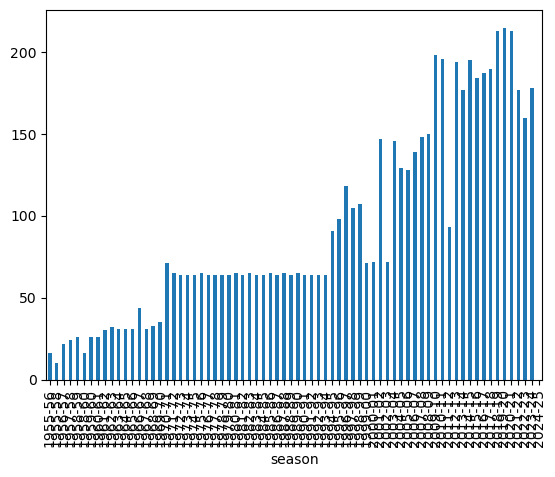

In [24]:
df.groupby('season')['remaining_teams_count'].max().plot.bar()

## Let's find all Eastern European clubs

In [25]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [26]:
easternClubs_wo_Germany = df[df['homeTeamCountry'].isin(easternCountries)]['homeTeam'].to_list()

In [27]:
easternGermanUrls = ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [28]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeam'].drop_duplicates().to_list() + df[df['homeTeamUrl'].isin(easternGermanUrls)]['homeTeam'].drop_duplicates().to_list()

In [29]:
easternClubs = easternClubs_wo_Germany + easternGermanClubs

In [30]:
east = df[df['homeTeam'].isin(easternClubs)]
east2 =  df[df['homeTeam'].isin(easternClubs) | df['awayTeam'].isin(easternClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

## Now for some basic exploration

<Axes: xlabel='season'>

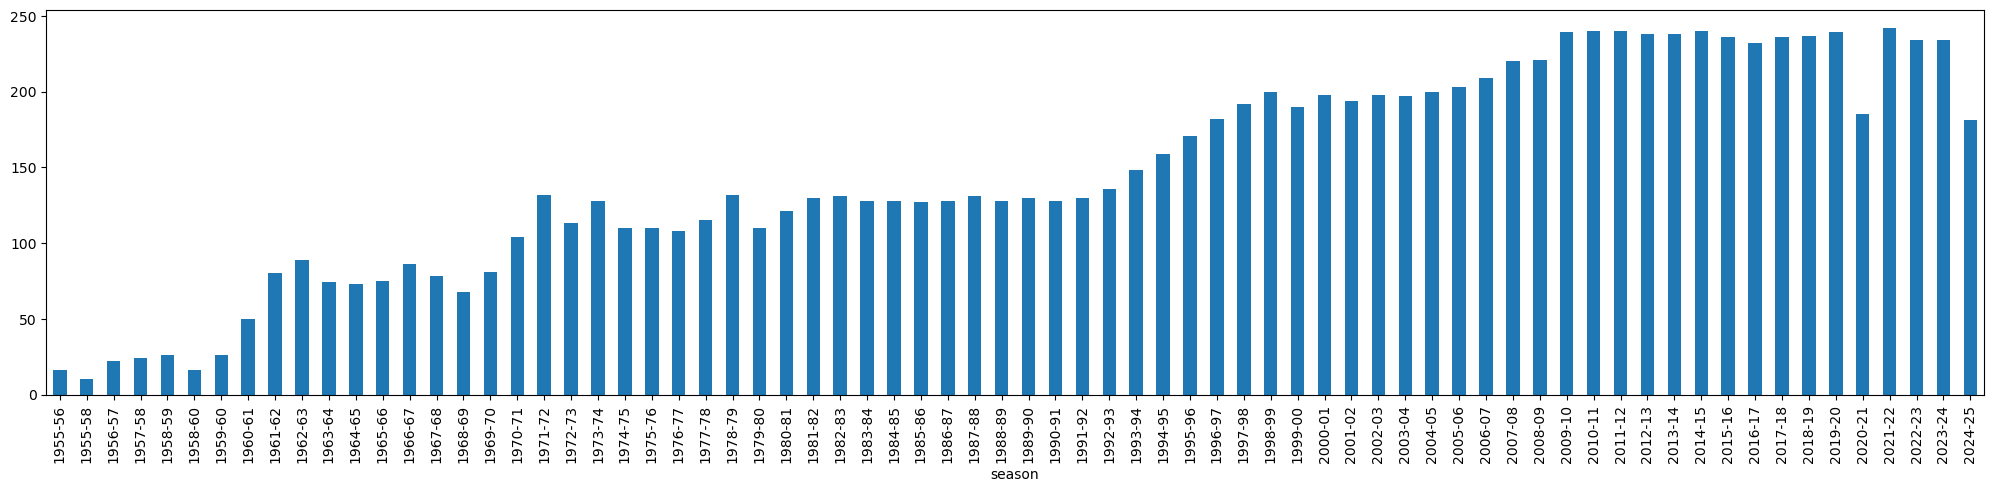

In [31]:
df.groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

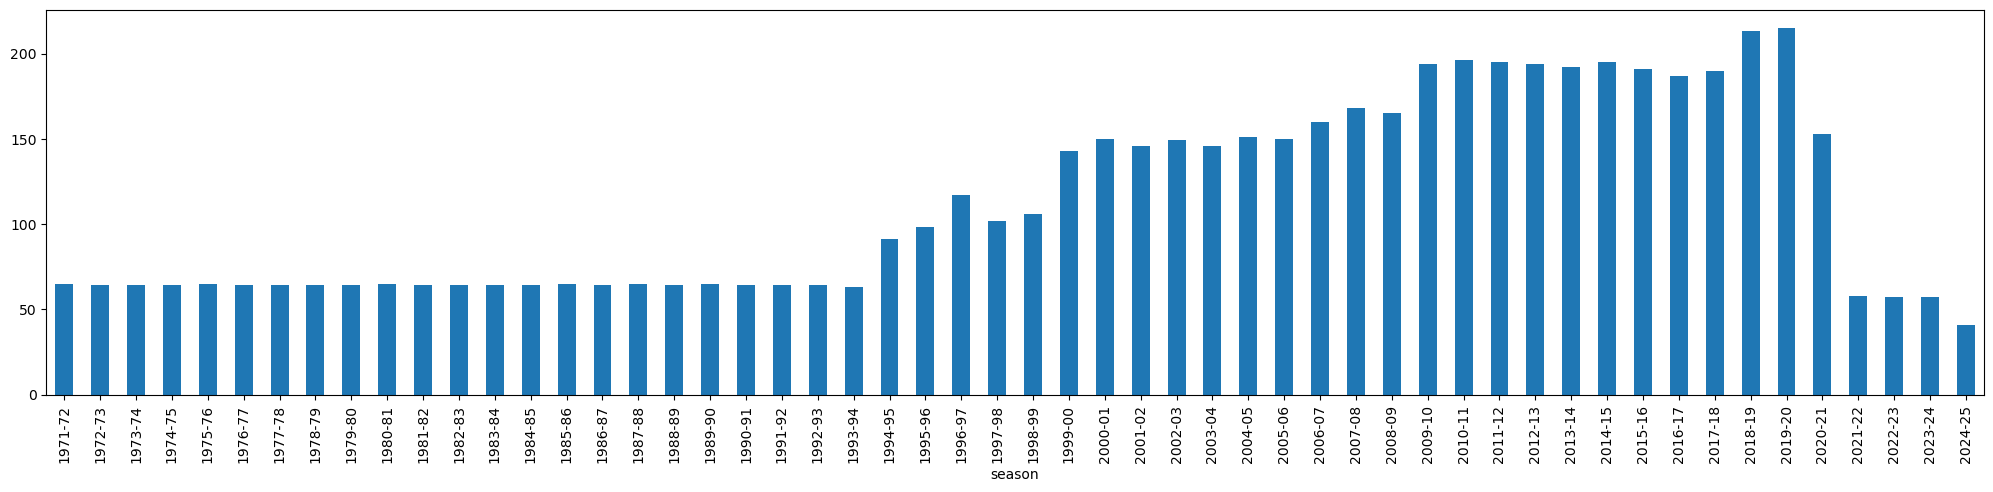

In [32]:
df[df['competition'] == 'EL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

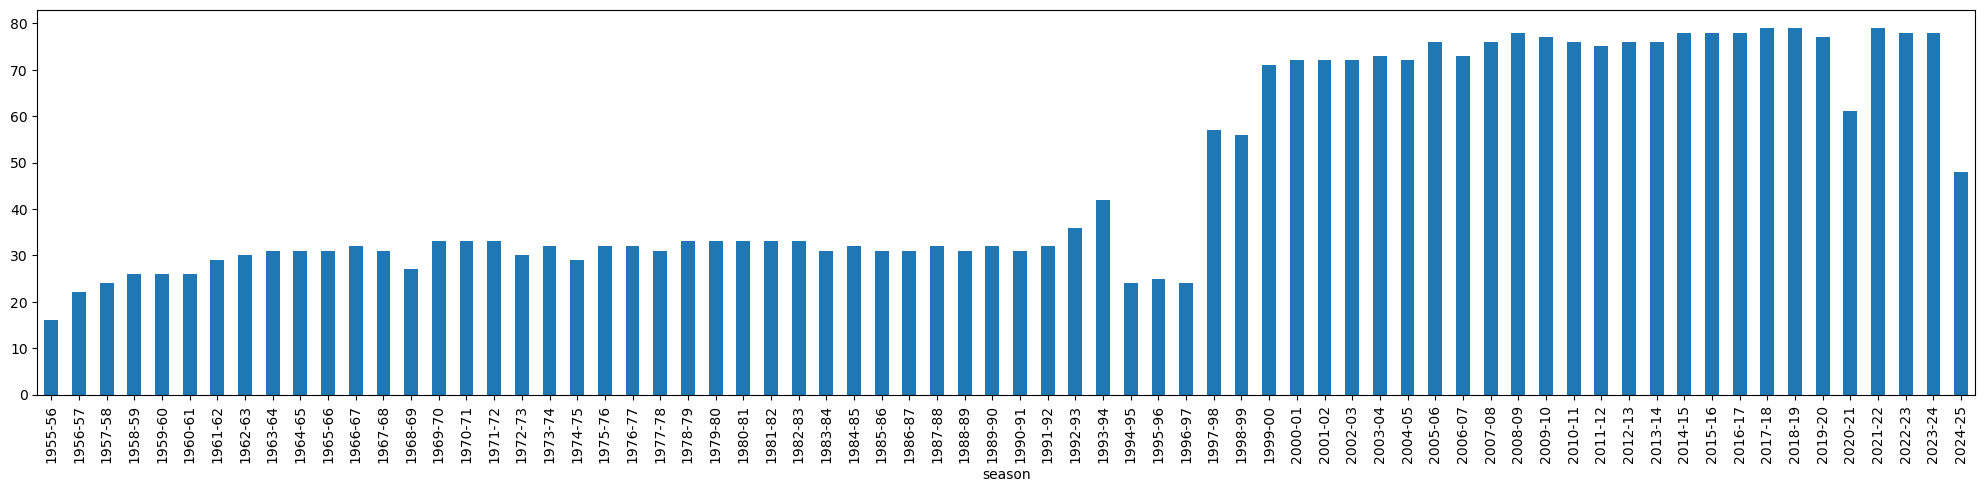

In [33]:
df[df['competition'] == 'UCL'].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

In [35]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(10)

homeTeam
Dynamo Kyiv          132
Red Star Belgrade     79
Shakhtar Donetsk      79
Sparta Prague         76
Steaua București      70
Dinamo Zagreb         67
Spartak Moscow        61
Partizan              53
BATE Borisov          52
CSKA Moscow           52
dtype: int64

In [45]:
east.groupby('city').size().nlargest(60)

city
Belgrade            374
Prague              340
Bucharest           339
Moscow              339
Budapest            310
Sofia               304
Kyiv                223
Zagreb              198
Baku                187
Tbilisi             152
Bratislava          142
Warsaw              142
Skopje              141
Yerevan             140
Tallinn             131
Tirana              108
Split               100
Donetsk              98
Riga                 94
Maribor              92
Tiraspol             90
Minsk                89
Saint Petersburg     88
Sarajevo             88
Chișinău             77
Vilnius              70
Leipzig              69
Podgorica            69
Plzeň                63
Poznań               62
Razgrad              62
Kraków               61
Cluj-Napoca          60
Trnava               60
Ljubljana            58
Rijeka               51
Chorzów              49
Barysaw              48
Craiova              47
Dresden              47
Žilina               47
Astana     

In [46]:
east[east['competition'] == 'UCL'].sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
19425,UCL,1989-05-24,0-4,Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Milan,Italy,AC_Milan,"Camp Nou, Barcelona",final,97000.0,1988–89 European Cup,1988-89,Barcelona,2.0,Steaua,București
19546,UCL,1991-05-29,0-0 (a.e.t.),Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587.0,1990–91 European Cup,1990-91,Bari,2.0,Red,Belgrade
19248,UCL,1986-05-07,0-0 (a.e.t.),Steaua București,Romania,CSA_Steaua_Bucure%C8%99ti_(football),Barcelona,Spain,FC_Barcelona,"Estadio Ramón Sánchez Pizjuán, Seville",final,65000.0,1985–86 European Cup,1985-86,Seville,2.0,Steaua,București
19422,UCL,1988-04-06,0-0,Steaua București,Romania,FCSB,Benfica,Portugal,S.L._Benfica,"Stadionul Steaua, Bucharest",semi-finals,21789.0,1987–88 European Cup,1987-88,Bucharest,4.0,Steaua,București
17585,UCL,1957-04-03,0-1,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Fiorentina,Italy,ACF_Fiorentina,"Stadion JNA, Belgrade",semi-finals,40000.0,1956–57 European Cup,1956-57,Belgrade,4.0,Red,Belgrade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25786,UCL,2024-08-07,v,Slovan Bratislava,Slovakia,%C5%A0K_Slovan_Bratislava,APOEL,Cyprus,APOEL_FC,"Národný futbalový štadión, Bratislava",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bratislava,NaN,Slovan,Bratislava
25787,UCL,2024-08-07,v,Slavia Prague,Czech Republic,SK_Slavia_Prague,Union Saint-Gilloise,Belgium,Royale_Union_Saint-Gilloise,"Fortuna Arena, Prague",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Prague,NaN,Slavia,Prague
25788,UCL,2024-08-13,v,Ferencváros,Hungary,NaN,Midtjylland,Denmark,NaN,"Ferencváros Stadion, Budapest",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Budapest,NaN,Ferencváros,Ferencváros
25792,UCL,2024-08-13,v,FCSB,Romania,NaN,Sparta Prague,Czech Republic,NaN,"Steaua Stadium, Bucharest",third qualifying round,NaN,2024–25 UEFA Champions League qualifying phase...,2024-25,Bucharest,NaN,FCSB,FCSB


In [47]:
east2.sort_values(by='remaining_teams_count').sort_values(by='remaining_teams_count')

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
19546,UCL,1991-05-29,0-0 (a.e.t.),Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Marseille,France,Olympique_de_Marseille,"Stadio San Nicola, Bari",final,51587.0,1990–91 European Cup,1990-91,Bari,2.0
3623,EL,1985-05-08,0-3,Videoton,Hungary,Videoton_FC,Real Madrid,Spain,Real_Madrid_CF,"Sóstói Stadion, Székesfehérvár",final,35000.0,1984–85 UEFA Cup,1984-85,Székesfehérvár,2.0
3624,EL,1985-05-22,0-1,Real Madrid,Spain,Real_Madrid_CF,Videoton,Hungary,Videoton_FC,"Santiago Bernabéu, Madrid",final,98300.0,1984–85 UEFA Cup,1984-85,Madrid,2.0
939,CWC,1986-05-02,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Stade de Gerland, Lyon",final,39300.0,1985–86 European Cup Winners' Cup,1985-86,Lyon,2.0
420,CWC,1974-05-08,2-0,Magdeburg,East Germany,1._FC_Magdeburg,Milan,Italy,A.C._Milan,"De Kuip, Rotterdam",final,4641.0,1973–74 European Cup Winners' Cup,1973-74,Rotterdam,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27174,UECL,2024-08-15,v,CFR Cluj,Romania,NaN,Maccabi Petah Tikva,Israel,NaN,"Dr. Constantin Rădulescu Stadium, Cluj-Napoca",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Cluj-Napoca,NaN
27176,UECL,2024-08-15,v,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
27177,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Wroclaw,NaN
27178,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN


<Axes: xlabel='season'>

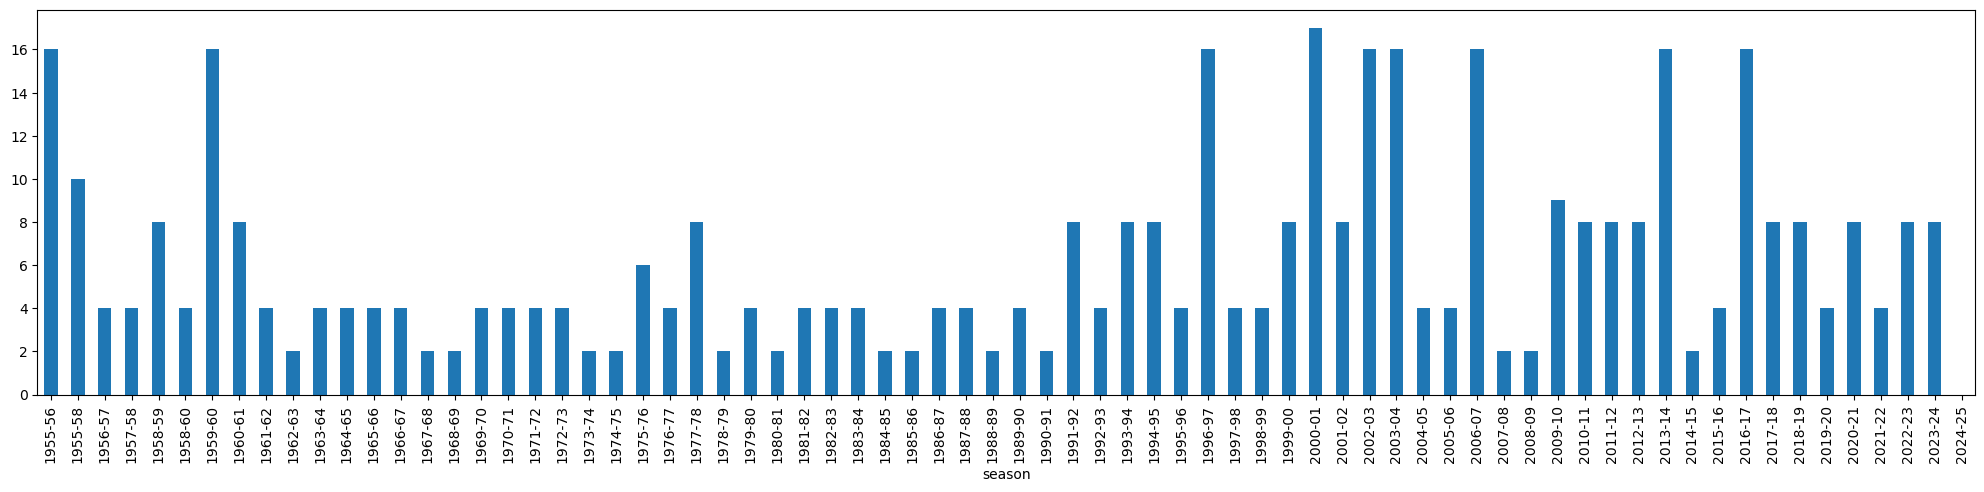

In [48]:
east.groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

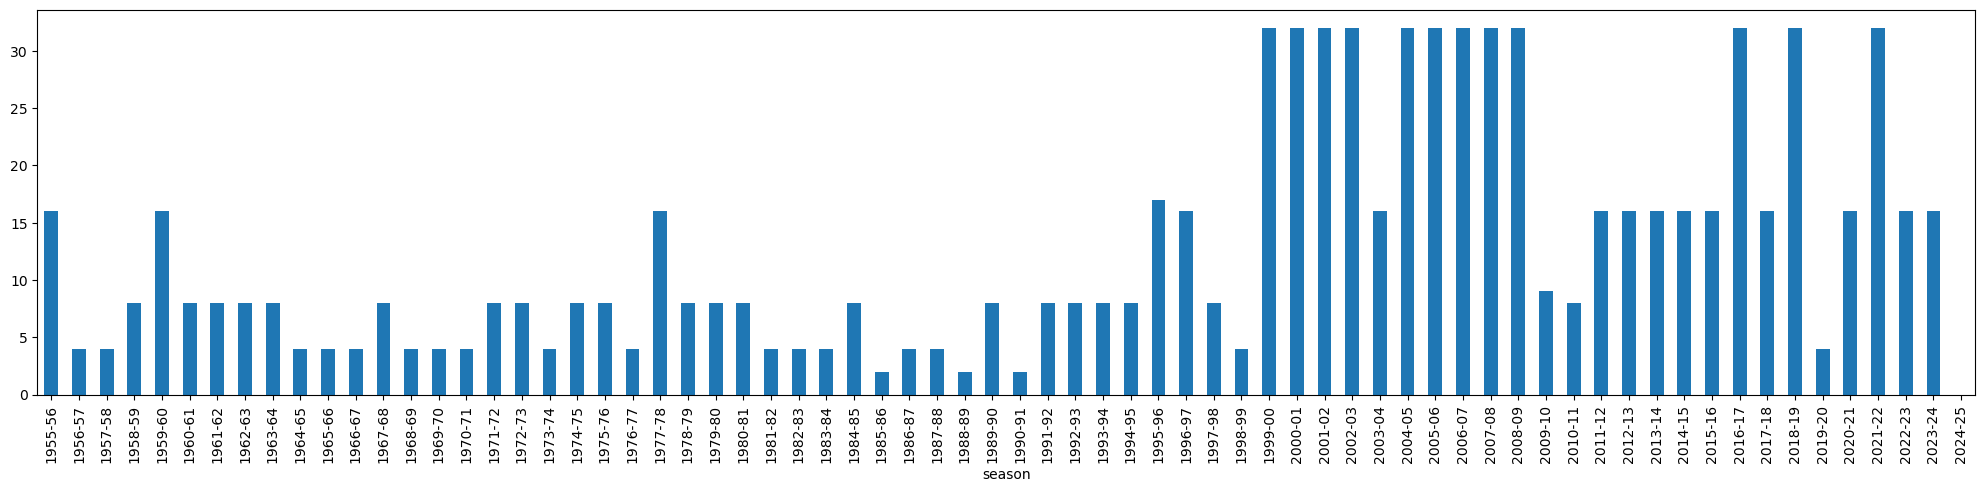

In [49]:
east[east['competition'] == 'UCL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [50]:
east[east['homeTeamCountry'] == 'Republic of Ireland']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
25848,UECL,2021-07-15,3-0,Bohemians,Republic of Ireland,NaN,Stjarnan,Iceland,NaN,"Aviva Stadium, Dublin",first qualifying round,6000.0,2021–22 UEFA Europa Conference League qualifyi...,2021-22,Dublin,177.0,Bohemians,Bohemians
26065,UECL,2021-07-29,3-0,Bohemians,Republic of Ireland,NaN,Dudelange,Luxembourg,NaN,"Aviva Stadium, Dublin",second qualifying round,6500.0,2021–22 UEFA Europa Conference League qualifyi...,2021-22,Dublin,142.0,Bohemians,Bohemians


In [51]:
east[east['competition'] == 'UCL'].groupby('homeTeamCountry')['remaining_teams_count'].min().nsmallest(50)

homeTeamCountry
Socialist Federal Republic of Yugoslavia     2.0
Romania                                      2.0
Ukraine                                      4.0
Poland                                       4.0
Bulgaria                                     4.0
Soviet Union                                 4.0
Czechoslovakia                               4.0
Hungary                                      4.0
Germany                                      4.0
Russia                                       8.0
Commonwealth of Independent States           8.0
Croatia                                      8.0
East Germany                                 8.0
Albania                                     16.0
Czech Republic                              16.0
Slovakia                                    24.0
Kazakhstan                                  32.0
Slovenia                                    32.0
Serbia                                      32.0
Moldova                                     32.0
Azer

<Axes: xlabel='season'>

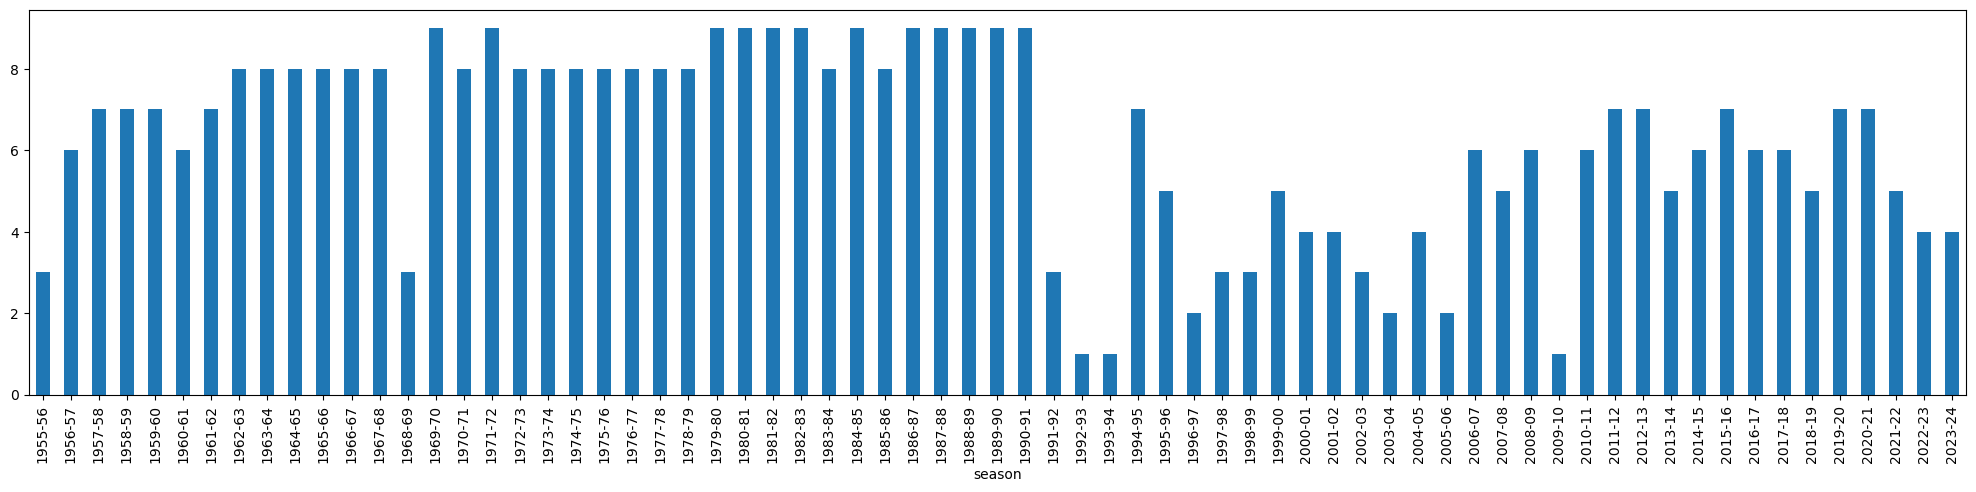

In [52]:
east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby('season')['homeTeam'].nunique().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

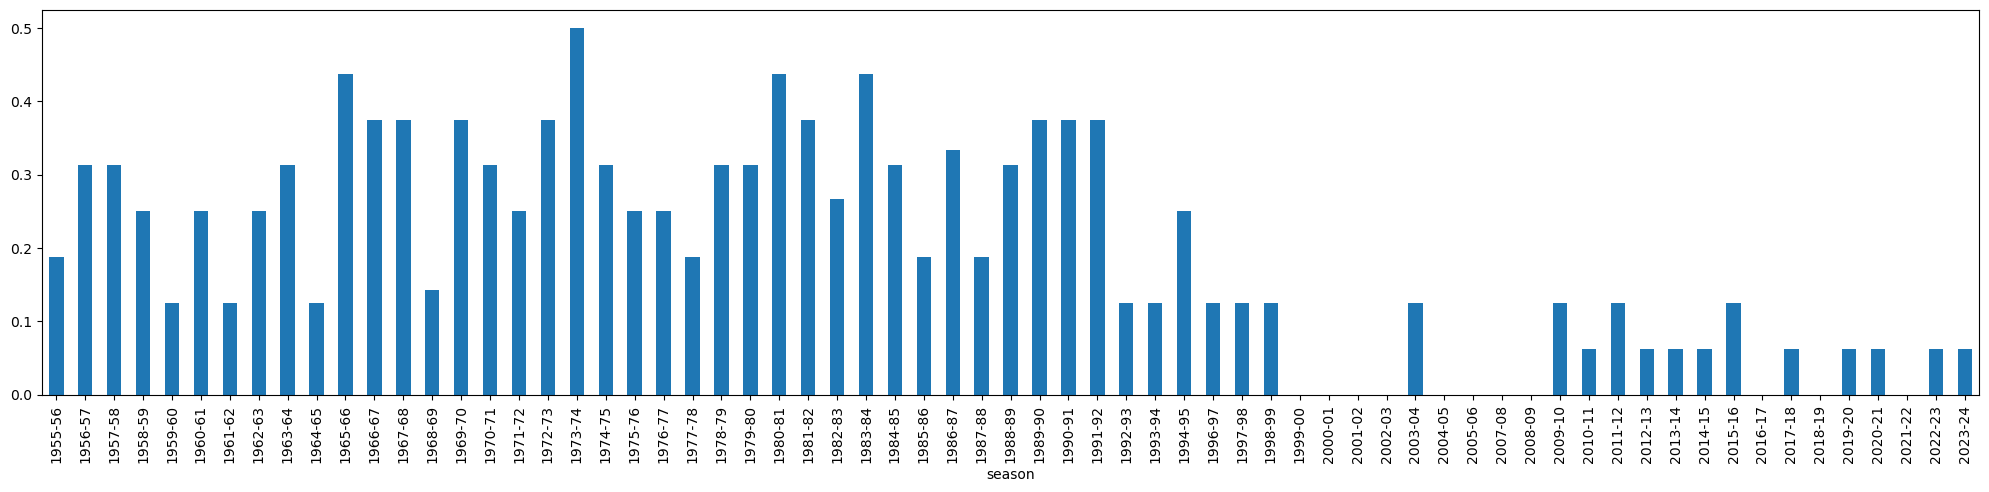

In [78]:
pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'UCL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

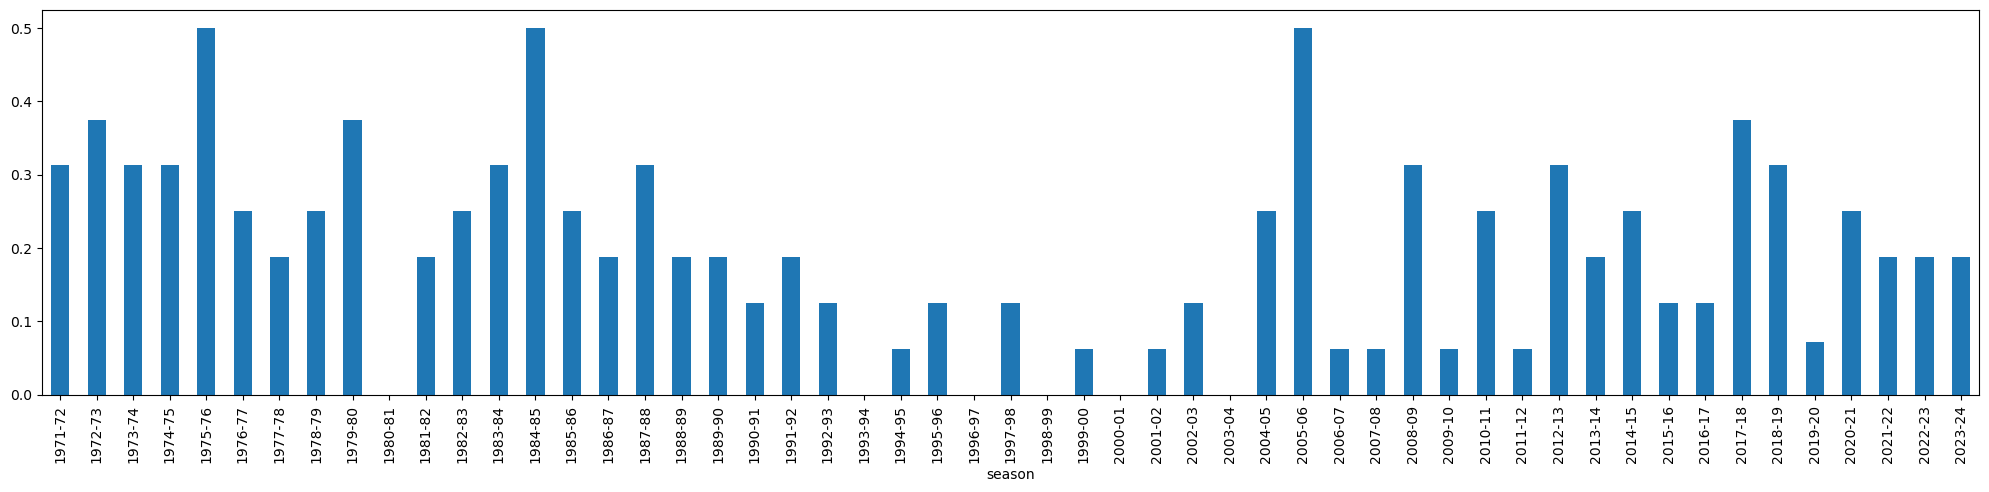

In [79]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [ ]:
pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique() / df[(df['competition'] == 'EL') & (df['remaining_teams_count'] <= 16)].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [80]:
east[(east['competition'] == 'UCL') & (east['season'] == '1991-92')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
Dynamo Kyiv              8.0
Red Star Belgrade        8.0
Sparta Prague            8.0
Etar Veliko Tarnovo      NaN
Flamurtari               NaN
Hansa Rostock            NaN
Kispest Honvéd           NaN
Universitatea Craiova    NaN
Zagłębie Lubin           NaN
Name: remaining_teams_count, dtype: float64

In [88]:
half = len(df[df['competition'] == 'UCL'].groupby('season').size()) / 2

In [90]:
df[df['competition'] == 'UCL'].groupby('season').size().head(35)

season
1955-56    29
1956-57    44
1957-58    48
1958-59    55
1959-60    52
1960-61    51
1961-62    56
1962-63    59
1963-64    61
1964-65    63
1965-66    59
1966-67    65
1967-68    60
1968-69    52
1969-70    63
1970-71    63
1971-72    64
1972-73    58
1973-74    60
1974-75    55
1975-76    61
1976-77    61
1977-78    59
1978-79    63
1979-80    63
1980-81    63
1981-82    63
1982-83    62
1983-84    59
1984-85    61
1985-86    59
1986-87    57
1987-88    61
1988-89    60
1989-90    61
dtype: int64

In [81]:
east[(east['competition'] == 'UCL') & (east['season'] == '1992-93')].groupby('homeTeam')['remaining_teams_count'].min().nsmallest(10)

homeTeam
CSKA Moscow           8.0
CSKA Sofia            NaN
Dinamo București      NaN
Ferencváros           NaN
Lech Poznań           NaN
Norma Tallinn         NaN
Olimpija Ljubljana    NaN
Skonto                NaN
Slovan Bratislava     NaN
Tavriya Simferopol    NaN
Name: remaining_teams_count, dtype: float64

In [95]:
east[(east['competition'] == 'UCL') & (east['season'] > '1989-90') & (east['remaining_teams_count'] <= 32)].groupby('homeTeam').size().nlargest(16)

homeTeam
Dynamo Kyiv               60
Shakhtar Donetsk          59
Spartak Moscow            43
CSKA Moscow               36
Sparta Prague             30
Zenit Saint Petersburg    30
RB Leipzig                24
Steaua București          22
Lokomotiv Moscow          19
Dinamo Zagreb             18
Red Star Belgrade         17
BATE Borisov              15
Viktoria Plzeň            12
CFR Cluj                   9
Maribor                    9
Legia Warsaw               7
dtype: int64

In [91]:
pd.Series(east[(east['competition'] == 'UCL') & (east['season'] <= '1989-90')].groupby('homeTeam').size() / east[(east['competition'] == 'UCL') & (east['season'] > '1989-90')].groupby('homeTeam').size()).sort_values().dropna()

homeTeam
Dinamo Zagreb             0.030769
CSKA Moscow               0.040000
Vardar                    0.090909
Levski Sofia              0.105263
Dinamo Tbilisi            0.105263
Spartak Moscow            0.109091
Lech Poznań               0.181818
Slovan Bratislava         0.181818
Wisła Kraków              0.230769
Sparta Prague             0.245902
Dynamo Kyiv               0.257143
Legia Warsaw              0.275862
Ferencváros               0.310345
Dinamo Tirana             0.400000
Steaua București          0.428571
Partizan                  0.432432
Vllaznia                  0.500000
ŁKS Łódź                  0.500000
Željezničar               0.500000
Śląsk Wrocław             0.500000
Sarajevo                  0.600000
Dinamo Minsk              0.600000
Widzew Łódź               0.625000
Red Star Belgrade         0.755556
Hajduk Split              0.818182
Rapid București           1.000000
Partizani                 1.400000
MTK Budapest              2.000000
CSKA Sofia 

<Axes: xlabel='season', ylabel='remaining_teams_count'>

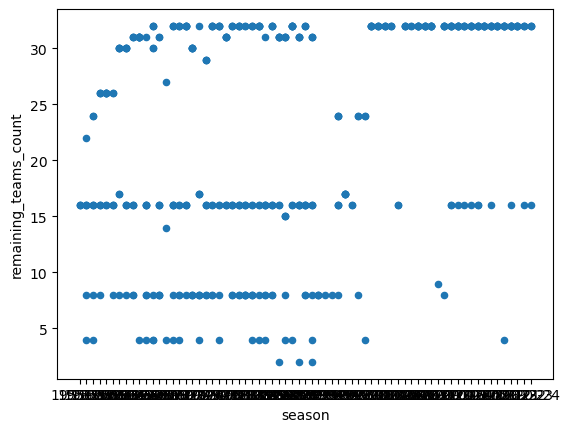

In [53]:
pd.DataFrame(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 32)].groupby(['season','homeTeam'])['remaining_teams_count'].min()).reset_index().plot.scatter(x='season',y='remaining_teams_count')

<Axes: xlabel='season'>

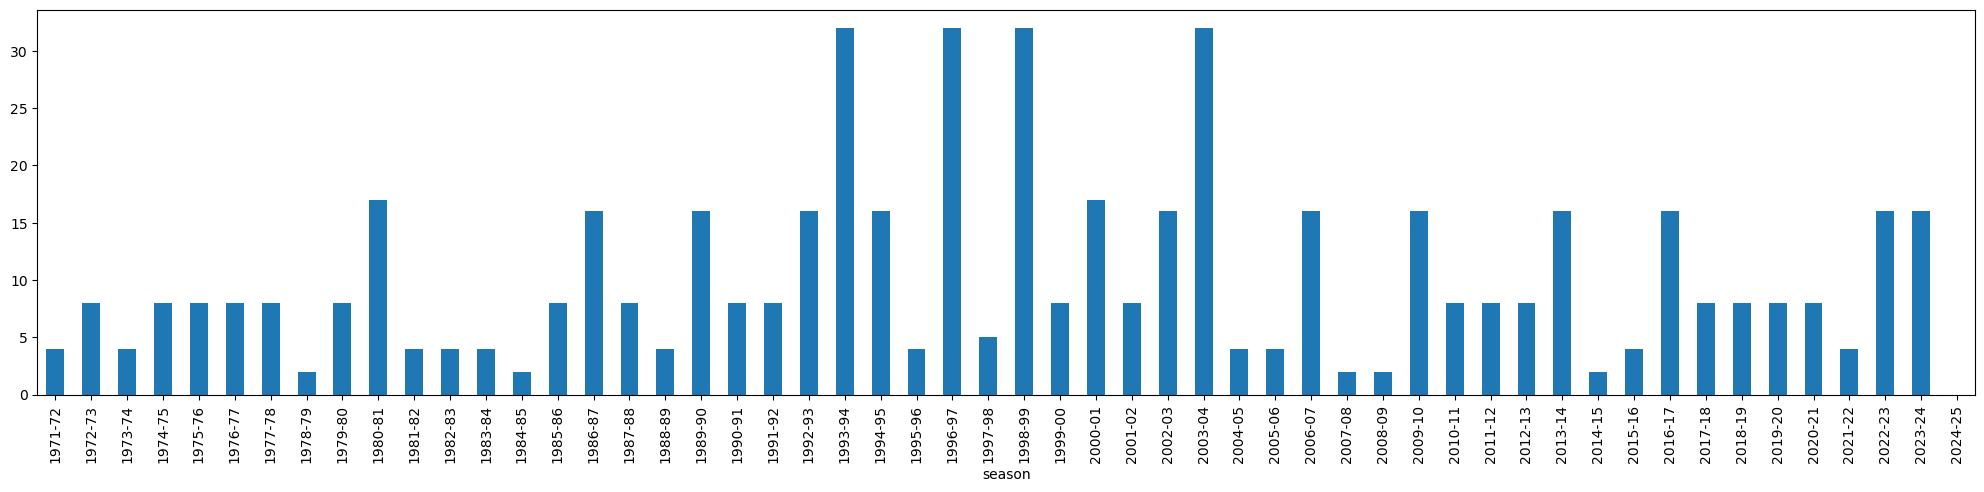

In [54]:
east[east['competition'] == 'EL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

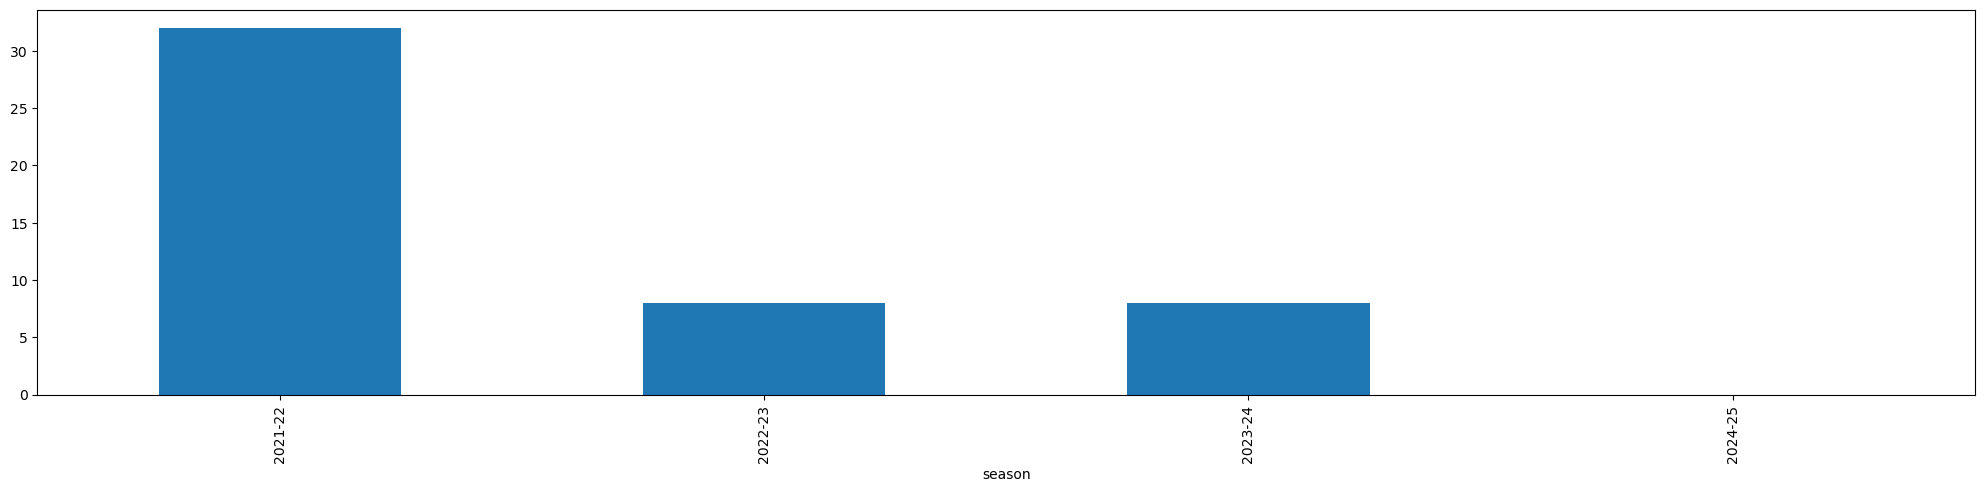

In [55]:
east[east['competition'] == 'UECL'].groupby('season')['remaining_teams_count'].min().plot.bar(figsize=(25,5))

In [56]:
east[(east['competition'] == 'UCL')].groupby(['season','homeTeamCountry'])['remaining_teams_count'].min()

season   homeTeamCountry                         
1955-56  Hungary                                     16.0
         Poland                                      16.0
         Socialist Federal Republic of Yugoslavia    16.0
1956-57  Bulgaria                                     8.0
         Czechoslovakia                              16.0
                                                     ... 
2024-25  Romania                                      NaN
         Serbia                                       NaN
         Slovakia                                     NaN
         Slovenia                                     NaN
         Ukraine                                      NaN
Name: remaining_teams_count, Length: 995, dtype: float64

## Club names

In [37]:
east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])

C:\Users\micha\AppData\Local\Temp\ipykernel_26876\3891702428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['nazev'] = east['homeTeam'].apply(lambda x: x.split(' ')[0])
C:\Users\micha\AppData\Local\Temp\ipykernel_26876\3891702428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east['dedina'] = east['homeTeam'].apply(lambda x: x.split(' ')[-1])


In [38]:
nazvy = east.groupby('nazev')['dedina'].nunique().nlargest(1000)
nazvy = nazvy[nazvy >= 3]
nazvy

nazev
Spartak      12
Dinamo       10
FK            8
Dynamo        7
CSKA          6
FC            5
Artmedia      3
Vasas         3
Torpedo       3
Arsenal       3
Budućnost     3
MTK           3
Inter         3
Lokomotiv     3
Slavia        3
Khazar        3
Metalurh      3
Levadia       3
NK            3
Zagłębie      3
Zenit         3
Daugava       3
Újpest        3
Bohemians     3
Olimpija      3
Name: dedina, dtype: int64

In [39]:
east[east['homeTeam'].str.lower().str.contains('kyi',na=False)]['homeTeam'].drop_duplicates()

481       Dynamo Kyiv
1896        CSKA Kyiv
10925    Arsenal Kyiv
Name: homeTeam, dtype: object

In [40]:
east[east['nazev'].str.contains('Slav',na=False)]['homeTeam'].drop_duplicates()

131      Slavia Sofia
1810    Slavia Prague
6211     Slavia Mozyr
8353    Slaven Belupo
9452          Slavija
Name: homeTeam, dtype: object

In [41]:
east[east['nazev'].str.contains('Olim',na=False)]['homeTeam'].drop_duplicates()

314      Olimpija Ljubljana
1583          Olimpija Rīga
8730             Olimps/RFS
8769           Olimpik Baku
9081         Olimpi Rustavi
9544               Olimpija
9555                Olimpia
11959               Olimpic
13315       Olimpik Donetsk
Name: homeTeam, dtype: object

In [42]:
east[east['nazev'].str.contains('Loko',na=False)]['homeTeam'].drop_duplicates()

541           Lokomotiv Sofia
715        Lokomotive Leipzig
1714         Lokomotiv Moscow
1943     Lokomotiv-96 Vitebsk
2029        Lokomotiv Plovdiv
2914        Lokomotíva Košice
11311              Lokomotiva
Name: homeTeam, dtype: object

In [43]:
east[east['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1151          Metalist Kharkiv
6819       Metalurh Zaporizhya
6903          Metalurh Donetsk
6980     Metalurh Zaporizhzhya
9589           Metalurg Skopje
10346      Metalurgist Rustavi
10554        Metalurgi Rustavi
Name: homeTeam, dtype: object

In [69]:
df['nazev'] = df['homeTeam'].apply(lambda x: x.split(' ')[0])
df['dedina'] = df['homeTeam'].apply(lambda x: x.split(' ')[-1])

In [70]:
df[df['nazev'].str.contains('Metal',na=False)]['homeTeam'].drop_duplicates()

1151          Metalist Kharkiv
6819       Metalurh Zaporizhya
6903          Metalurh Donetsk
6980     Metalurh Zaporizhzhya
9589           Metalurg Skopje
10346      Metalurgist Rustavi
10554        Metalurgi Rustavi
Name: homeTeam, dtype: object

In [73]:
df[df['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

8           Dinamo Zagreb
32          Dynamo Žilina
207           Dynamo Kiev
289      Dinamo București
339         Dinamo Tirana
364         Dynamo Moscow
481           Dynamo Kyiv
642        Dinamo Tbilisi
764        Dynamo Dresden
1067         Dinamo Minsk
1621        Dinamo Batumi
1658      Dinamo-93 Minsk
5515     Dinamo Bucharest
5711          Dynamo Baku
8405         Dinamo Brest
13748        Dynamo Brest
15668      Dinamo Pitești
15803        Dinamo Bacău
Name: homeTeam, dtype: object

In [44]:
east[east['nazev'].str.contains('namo',na=False)]['homeTeam'].drop_duplicates()

8           Dinamo Zagreb
32          Dynamo Žilina
207           Dynamo Kiev
289      Dinamo București
339         Dinamo Tirana
364         Dynamo Moscow
481           Dynamo Kyiv
642        Dinamo Tbilisi
764        Dynamo Dresden
1067         Dinamo Minsk
1621        Dinamo Batumi
1658      Dinamo-93 Minsk
5515     Dinamo Bucharest
5711          Dynamo Baku
8405         Dinamo Brest
13748        Dynamo Brest
15668      Dinamo Pitești
15803        Dinamo Bacău
Name: homeTeam, dtype: object

## Attendance

In [57]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count
0,CWC,1960-08-01,2-1,ASK Vorwärts Berlin,East Germany,FC_Viktoria_Frankfurt,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,"Stadion der Freundschaft, Frankfurt (Oder)",qualifying phase,8000.0,1960–61 European Cup Winners' Cup,1960-61,Frankfurt,10.0
1,CWC,1960-08-11,2-0,Rudá Hvězda Brno,Czechoslovakia,NaN,ASK Vorwärts Berlin,East Germany,NaN,"Stadion Za Lužánkami, Brno",qualifying phase,15000.0,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
2,CWC,1960-09-28,4-2,Rangers,Scotland,Rangers_F.C.,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"Ibrox Park, Glasgow",qualifying phase,36000.0,1960–61 European Cup Winners' Cup,1960-61,Glasgow,10.0
3,CWC,1960-10-12,2-1,Ferencváros,Hungary,NaN,Rangers,Scotland,NaN,"Üllői úti stadion, Budapest",qualifying phase,25000.0,1960–61 European Cup Winners' Cup,1960-61,Budapest,10.0
4,CWC,1960-09-28,0-0,Rudá Hvězda Brno,Czechoslovakia,Rud%C3%A1_Hv%C4%9Bzda_Brno,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,NK_Dinamo_Zagreb,"Stadion Za Lužánkami, Brno",tournament phase,7000.0,1960–61 European Cup Winners' Cup,1960-61,Brno,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,UECL,2024-08-15,v,Gent,Belgium,NaN,Silkeborg,Denmark,NaN,"Planet Group Arena, Ghent",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Ghent,NaN
27176,UECL,2024-08-15,v,Zira,Azerbaijan,NaN,Osijek,Croatia,NaN,"Dalga Arena, Baku",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Baku,NaN
27177,UECL,2024-08-15,v,Śląsk Wrocław,Poland,NaN,St. Gallen,Switzerland,NaN,"Wrocław Stadium, Wroclaw",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Wroclaw,NaN
27178,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25,Mostar,NaN


In [58]:
df['attendance'] = pd.to_numeric(df['attendance'])

In [59]:
df[df['remaining_teams_count'] > 2].groupby('season')['attendance'].mean()

season
1955-56    30777.928571
1955-58    33821.166667
1956-57    39929.720930
1957-58    38650.787234
1958-59    35348.481481
               ...     
2019-20    18029.707928
2020-21      494.671642
2021-22    14156.365885
2022-23    20313.686275
2023-24    21334.728180
Name: attendance, Length: 71, dtype: float64

<Axes: xlabel='season'>

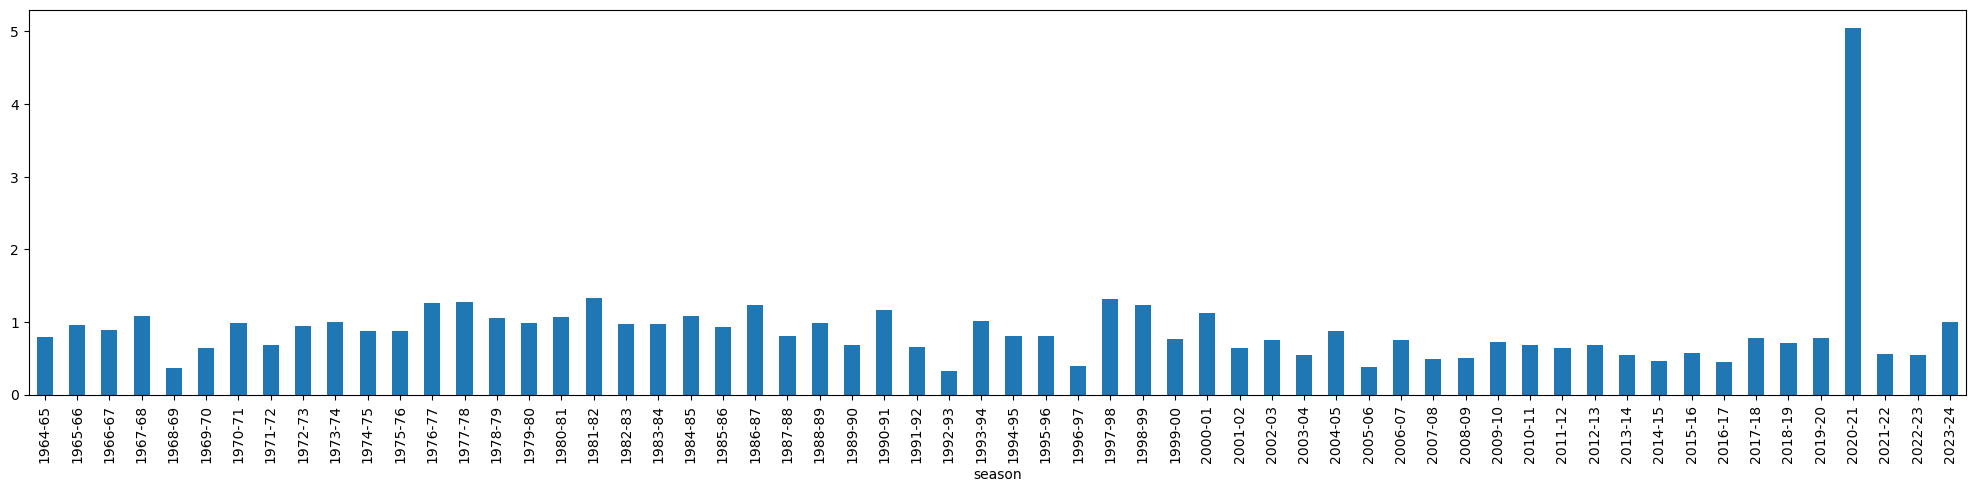

In [60]:
pd.Series(east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean() / df[(df['remaining_teams_count'] > 2) & (df['remaining_teams_count'] <= 32) & (df['competition'] == 'UCL')].groupby('season')['attendance'].mean()).tail(60).plot.bar(figsize=(25,5))

In [61]:
east[east['attendance'] == 291333]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina


In [62]:
east[east['city'] == 'Lyon']

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_teams_count,nazev,dedina
939,CWC,1986-05-02,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Stade de Gerland, Lyon",final,39300.0,1985–86 European Cup Winners' Cup,1985-86,Lyon,2.0,Dynamo,Kyiv


In [63]:
east.groupby('city')['attendance'].median().nlargest(60)

city
Barcelona                   97000.0
Seville                     65000.0
Bari                        51587.0
Chorzow                     48617.0
Germany                     46969.0
Manchester                  43878.0
Odessa                      40887.0
Lyon                        39300.0
Lenin Dinamo Stadium        35000.0
Bazaly                      33000.0
Dresden                     33000.0
Kharkiv                     33000.0
Leningrad                   32000.0
Brussels                    30000.0
Leipzig                     27750.0
Volgograd                   26000.0
Kyiv                        25991.0
Kiev                        25811.5
Donetsk                     25500.0
Kryvyi Rih                  25440.0
Bytom                       25000.0
Magdeburg                   25000.0
Gdańsk                      24697.0
Karl-Marx-Stadt             24300.0
Lviv                        23618.0
Mielec                      23385.0
Split                       22112.0
Aue                    

In [64]:
east.groupby('location')['attendance'].max().nlargest(50)

location
Red Star Stadium, Belgrade                   110000.0
Central Stadium, Kyiv                        102000.0
Olympic Stadium, Kyiv                        100069.0
Republican Stadium, Kyiv                     100067.0
Népstadion, Budapest                         100000.0
Camp Nou, Barcelona                           97000.0
Respublikanskiy Stadium, Kyiv                 93700.0
Lenin Dinamo Stadium, Tbilisi                 90000.0
Stadion Crvena Zvezda, Belgrade               90000.0
Vladimir Lenin Stadium, Tbilisi               90000.0
Marakana, Belgrade                            89806.0
Silesian Stadium, Chorzów                     89089.0
Central Lenin Stadium, Moscow                 86500.0
Stadion Crvena zvezda, Belgrade               85227.0
Central Stadium Vladimir Lenin, Moscow        85000.0
Stadion Śląski, Chorzów                       85000.0
Stadionul August 23, Bucharest                85000.0
Olimpiyskiy National Sports Complex, Kyiv     83200.0
Olimpiyskiy NSC, Ky

In [65]:
df[df['season'] >= '2021-22'].groupby('location')['attendance'].median().nlargest(60)

location
Wembley Stadium, London                      86212.0
Westfalenstadion, Dortmund                   81182.5
Camp Nou, Barcelona                          75468.0
Allianz Arena, Munich                        75000.0
Stade de France, Saint-Denis                 75000.0
Old Trafford, Manchester                     73130.0
Atatürk Olympic Stadium, Istanbul            71412.0
San Siro, Milan                              71368.0
Metropolitano Stadium, Madrid                63423.5
Estádio do Sport Lisboa e Benfica, Lisbon    62594.0
Santiago Bernabéu, Madrid                    62271.5
Wanda Metropolitano Stadium, Madrid          60725.0
Stade Vélodrome, Marseille                   60141.5
Emirates Stadium, London                     59929.0
Olympic Stadium, Athens                      57003.0
Puskás Aréna, Budapest                       56075.5
Celtic Park, Glasgow                         55640.0
Tottenham Hotspur Stadium, London            55180.0
Estádio da Luz, Lisbon               

In [66]:
df[df['season'] > '2013-14'].groupby('awayTeam')['attendance'].median().nlargest(60)

awayTeam
Newcastle United            65695.0
Brighton & Hove Albion      57780.0
Paris Saint-Germain         49333.0
Barcelona                   47470.0
Inter Milan                 47443.5
Real Madrid                 46585.0
Oostende                    46519.0
Manchester City             44855.5
Bayern Munich               44510.0
Juventus                    42186.0
Dinamo București            41845.0
Liverpool                   39186.5
Valencia                    39070.0
Atlético Madrid             37447.0
RB Leipzig                  37351.5
Porto                       36919.0
Rostov                      36896.0
Chelsea                     35127.0
Borussia Dortmund           34598.0
Lens                        34055.5
Benfica                     33815.0
CSKA Moscow                 33651.5
Utrecht                     33446.0
Arsenal                     33228.0
Celta Vigo                  33117.0
Toulouse                    32719.0
Napoli                      32391.0
SC Freiburg        

In [67]:
east[(east['remaining_teams_count'] > 2) & (east['remaining_teams_count'] <= 32) & (east['competition'] == 'UCL')].groupby('season')['attendance'].mean()

season
1955-56    30000.000000
1956-57    38000.000000
1957-58    37750.000000
1958-59    24166.666667
1959-60    43125.000000
               ...     
2019-20    31405.208333
2020-21     6756.590909
2021-22    19505.400000
2022-23    26833.923077
2023-24    52031.769231
Name: attendance, Length: 69, dtype: float64

## A potential plot twist: is there _more_ European-level soccer in the East after all?

In [96]:
east['competition'].drop_duplicates()

0         CWC
1996       EL
15340    ICFC
17518     UCL
25800    UECL
Name: competition, dtype: object

<Axes: xlabel='season'>

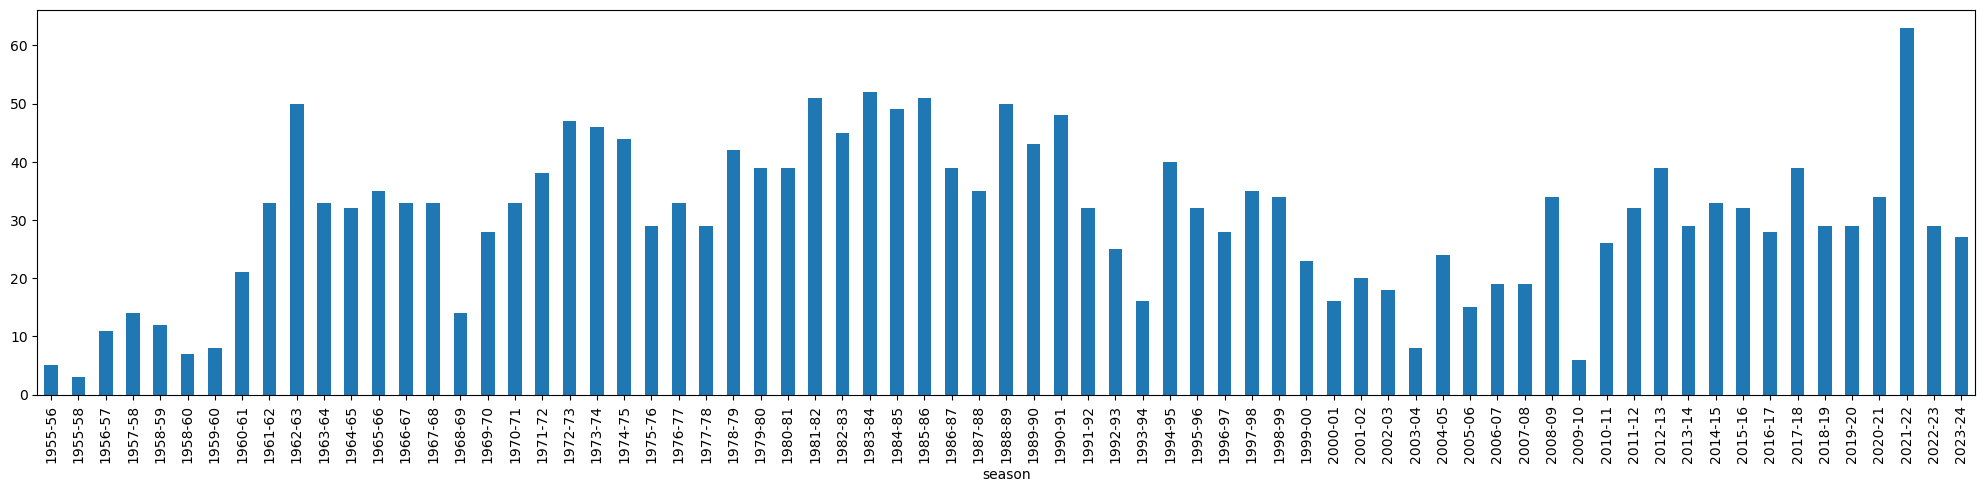

In [101]:
east[east['remaining_teams_count'] <= 32].groupby('season').size().plot.bar(figsize=(25,5))

In [161]:
top4 = df[df['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(4).index.to_list()
top4

['Real Madrid', 'Bayern Munich', 'Barcelona', 'Juventus']

In [169]:
df[df['homeTeam'].str.contains('Manchester',na=False)].groupby('homeTeam').size()

homeTeam
Manchester City       96
Manchester United    205
dtype: int64

In [170]:
top8 = ['Real Madrid','Milan','Inter Milan','Bayern Munich','Bayern Münich','FC Bayern Munich','Liverpool','Barcelona','FC Barcelona','Ajax','Manchester United']

In [109]:
allseasons = df[df['competition'] == 'UCL']['season'].drop_duplicates().to_list()

In [173]:
dobryfotbal = pd.Series(east[east['awayTeam'].isin(top8)].groupby('season')['homeTeam'].nunique().reindex(allseasons[:-1]), name="proti Realu, Interu, AC Milán, Bayernu, Liverpoolu, Barceloně, Ajaxu a Manchasteru United")

<Axes: xlabel='season'>

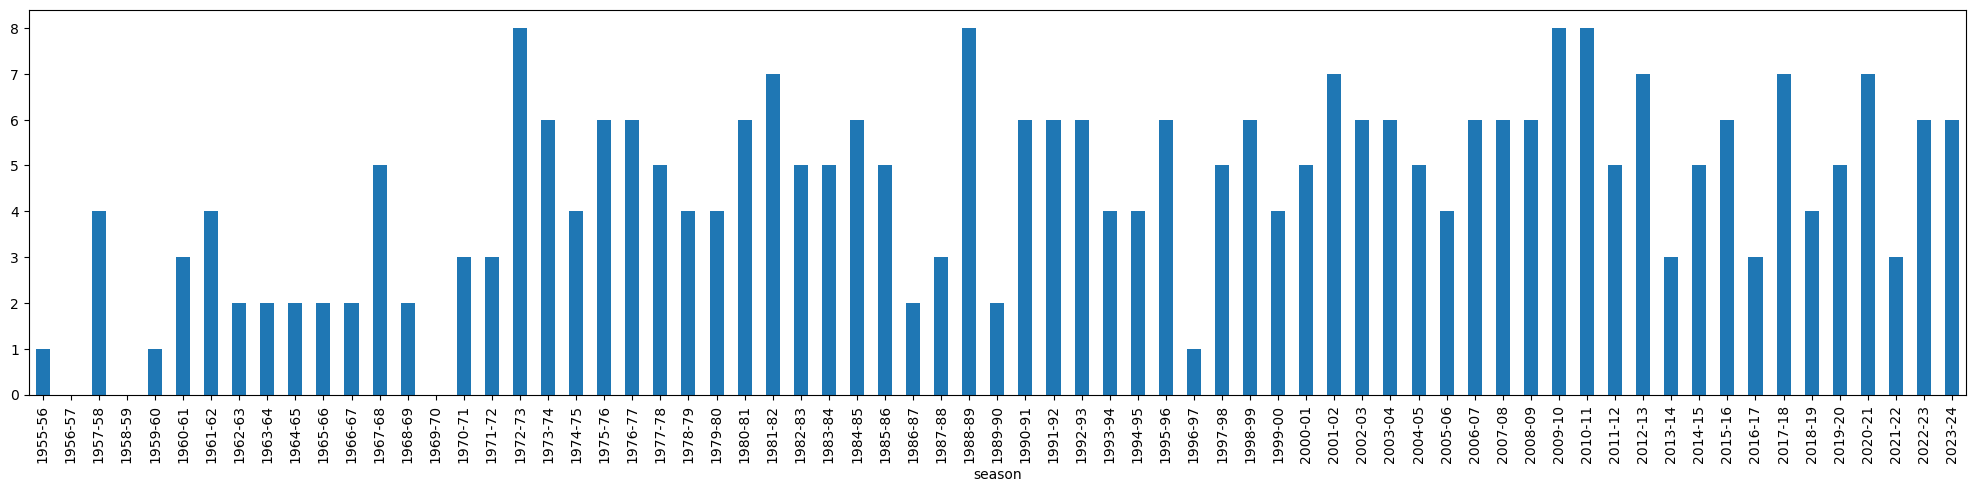

In [174]:
dobryfotbal.plot.bar(figsize=(25,5))

In [141]:
vsechenfotbal = pd.Series(east.groupby('season').size().reindex(allseasons[:-1]), name="všechna utkání")

<Axes: xlabel='season'>

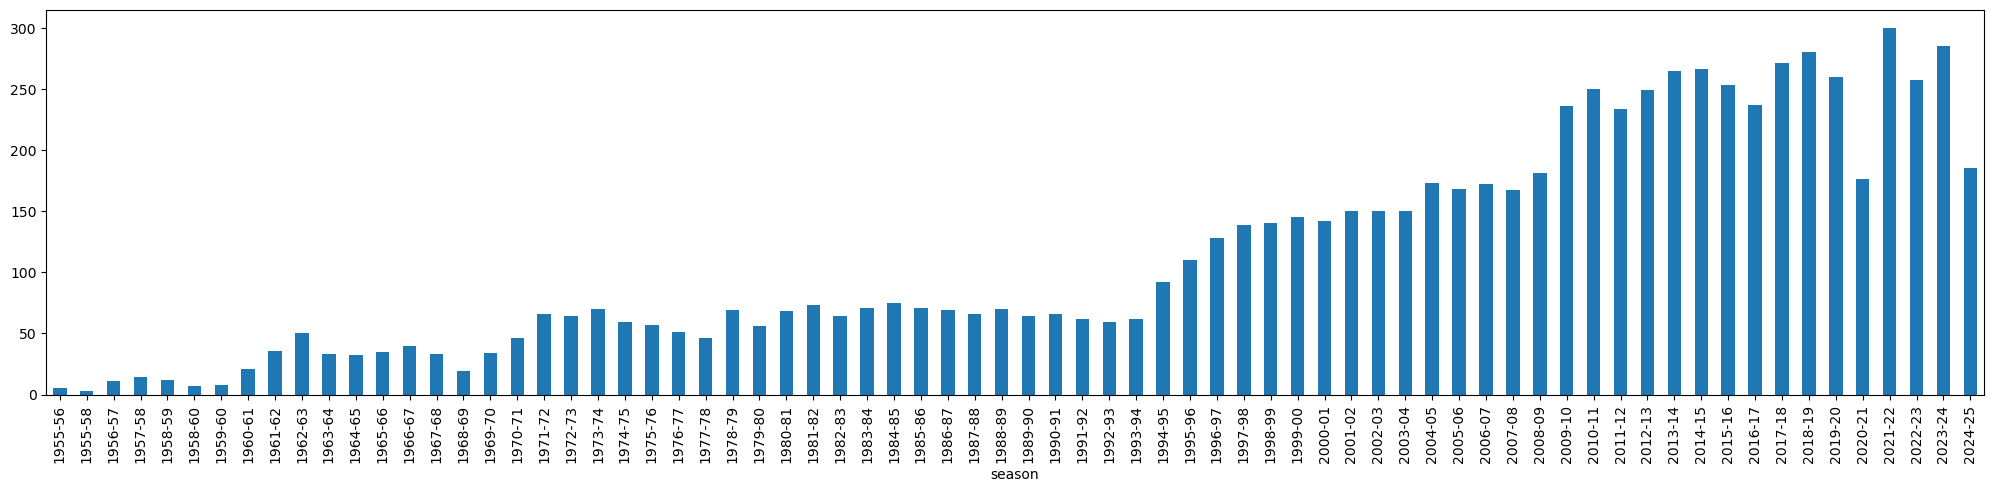

In [137]:
vsechenfotbal.plot.bar(figsize=(25,5))

## Grafy

In [213]:
def irozhlas_graf(
    carovy=[],
    sloupcovy=[],
    vodorovny=[],
    procenta=[],
    skryte=[],
    barvy=[],
    histogram=False,
    max_procenta=100,
    target="",
    titulek="",
    podtitulek="",
    naproti = [],
    osay=" ",
    osay2=" ",
    osaymin=None,
    osaymax=None,
    kredity=["zdroj dat a autorstvo", "url odkazu"],
    zaokrouhleni=1,
    prvni=True,
    skladany=False,
    naopak=False,
    vzhurunohama=False,
    skrytnuly=False,
):
    """
    Funkce vygeneruje HighCharts graf z pandas Series (jedné nebo více).

    iROZHLAS-friendly barvy:
    - "#b2e061" světle zelená
    - "#7eb0d5" světle modrá
    - "#fd7f6f" světle červená
    - "#bd7ebe" světle fialová
    - "#ffb55a" oranžová
    - "#ffee65" žlutá
    - "#beb9db" levandulová
    - "#fdcce5" skoro černá
    - "#8bd3c7" světle tyrkysová
    """

    import os
    import pandas as pd
    from highcharts_core.chart import Chart
    from highcharts_core.options.series.area import LineSeries
    from highcharts_core.options.series.bar import ColumnSeries
    from highcharts_core.options.series.bar import BarSeries
    from highcharts_core.options.series.histogram import HistogramSeries
    from highcharts_core.options.legend import Legend
    from highcharts_core.options.title import Title
    from highcharts_core.options.subtitle import Subtitle
    from highcharts_core.options.credits import Credits

    nastaveni = {}

    if prvni:
        zdrojaky = f"""<script src="https://code.highcharts.com/highcharts.js"></script><style type="text/css">text{{font-family:"Asap"!important}}.paragraph{{font-family:"Noticia text"!important}}.href{{color:#666;fill:#666}}.highcharts-title{{font-family:"Noticia text"!important;font-weight:700!important;text-align:left!important;left:10px!important}}.highcharts-subtitle{{text-align:left!important;font-size:.95rem!important;left:10px!important;font-family:"Asap"!important}}.highcharts-data-labels text{{font-size:.85rem!important}}.highcharts-axis-labels text{{font-size:.85rem!important}}text.highcharts-plot-line-label{{font-size:.85rem!important;fill:#666}}text.highcharts-plot-band-label{{font-size:.85rem!important;fill:#666}}text.highcharts-credits{{font-size:.75rem!important}}.highcharts-tooltip span{{font-family:"Asap"!important}}.axis-label-on-tick{{fill:#aaa;color:#aaa}}.mock-empty-line{{fill:#fff;color:#fff}}</style>"""
    else:
        zdrojaky = ""

    pred = f"""{zdrojaky}
        <figure id="{target}">
        <div id="container"></div>
        </figure>
        <script>"""

    if len(carovy) > 0:
        categories = carovy[0].index.to_list()
    if len(sloupcovy) > 0:
        categories = sloupcovy[0].index.to_list()
    if len(vodorovny) > 0:
        categories = vodorovny[0].index.to_list()

    categories = [str(x) for x in categories]

    nastaveni["xAxis"] = {"categories": categories, "min": 0}
    nastaveni["yAxis"] = [
        {
            "title": {"text": osay},
            "reversed": vzhurunohama,
            "max": osaymax,
            "min": osaymin,
        }
    ]

    if skladany:
        if len(sloupcovy) > 0:
            nastaveni["plotOptions"] = {"column": {"stacking": "normal"}}
        if len(vodorovny) > 0:
            nastaveni["plotOptions"] = {"bar": {"stacking": "normal"}}
    if histogram:
        nastaveni["plotOptions"] = {
            "column": {
                "pointPadding": 0,
                "borderWidth": 0,
                "groupPadding": 0,
                "shadow": False,
            }
        }

    if len(procenta) > 0:
        osa_procent = {
            "title": {"text": osay2},
            "max": max_procenta,
            "min": 0,
            "labels": {"format": "{value} %"},
        }

        if len(procenta) != len(carovy) + len(sloupcovy):
            osa_procent["opposite"] = True
            druha_osa = 1
            nastaveni["yAxis"].append(osa_procent)
            nastaveni["alignTicks"] = False
        if len(procenta) == len(carovy) + len(sloupcovy):
            nastaveni["yAxis"] = [osa_procent]
            druha_osa = 0
            
    if len(naproti) > 0:
        druha_osa = 1
        druha_osa_y =  {
            "title": {"text": osay2},
            "opposite": True,
            "max": naproti[0].max(),
            "min": 0
        }
        nastaveni["yAxis"].append(druha_osa_y)

    my_chart = Chart(container=target, options=nastaveni)

    procenta = [p.name for p in procenta]
    naproti = [n.name for n in naproti]
    skryte = [s.name for s in skryte]

    def vykresleni(serie, typ):
        for s in serie:
            popisek = s.name

            if s.name in skryte:
                viditelnost = False
            else:
                viditelnost = True

            ktera_osa = 0
            if s.name in naproti:
                ktera_osa = druha_osa
                
            if s.name in procenta:
                s = [round(x * 100, zaokrouhleni) for x in s.fillna(0).to_list()]
                my_chart.add_series(
                    typ(
                        data=s,
                        visible=viditelnost,
                        name=popisek,
                        y_axis=druha_osa,
                        tooltip={"valueSuffix": " %"},
                    )
                )
                    
            else:
                my_chart.add_series(
                    typ(
                        data=s.fillna(0).to_list(),
                        visible=viditelnost,
                        name=popisek,
                        y_axis=ktera_osa,
                    )
                )

    if len(sloupcovy) > 0:
        vykresleni(sloupcovy, ColumnSeries)
    if len(carovy) > 0:
        vykresleni(carovy, LineSeries)
    if len(vodorovny) > 0:
        vykresleni(vodorovny, BarSeries)

    if len(barvy) > 0:
        my_chart.options.colors = barvy
    else:
        my_chart.options.colors = colors = [
            "#b2e061",  ## světle zelená (light green)
            "#7eb0d5",  ## světle modrá (light blue)
            "#fd7f6f",  ## světle červená (light red)
            "#bd7ebe",  ## světle fialová (light purple)
            "#ffb55a",  ## oranžová (orange)
            "#ffee65",  ## žlutá (yellow)
            "#beb9db",  ## levandulová (lavender)
            "#fdcce5",  ## skoro černá
            "#8bd3c7",  ## světle tyrkysová (light turquoise)
        ]

    if naopak:
        my_chart.options.legend = Legend(reversed=True)

    my_chart.options.title = Title(text=titulek, align="left", margin=30)

    if len(podtitulek) > 0:
        my_chart.options.subtitle = Subtitle(text=podtitulek, align="left")

    my_chart.options.credits = Credits(text=kredity[0], enabled=True, href=kredity[1])

    as_js_literal = my_chart.to_js_literal()

    if skrytnuly == True:
        as_js_literal = as_js_literal.replace("y: 0.0", "y: null")

    code = f"<html><head><title>{titulek}</title></head><body>{pred}{as_js_literal}</script></body></html>"

    if not os.path.exists("grafy"):
        os.mkdir("grafy")

    with open(os.path.join("grafy", target + ".html"), "w+") as f:
        f.write(code)

    with open(os.path.join("grafy", target + ".txt"), "w+") as f:
        f.write(f"{pred}{as_js_literal}</script>")

        print("Graf uložen.")

In [125]:
ligamistru = pd.Series(east[(east['competition'] == 'UCL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="PMEZ / Liga mistrů")
uefa = pd.Series(east[(east['competition'] == 'EL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Pohár UEFA / EL")
pvp = pd.Series(east[(east['competition'] == 'CWC') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Pohár vítězů pohárů")
uecl = pd.Series(east[(east['competition'] == 'UECL') & (east['remaining_teams_count'] <= 8)].groupby('season')['homeTeam'].nunique().reindex(allseasons), name="Konfederační liga")

In [131]:
podpis = ['Vizualizace: Samizdat, datový tým Českého rozhlasu','https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika']

In [206]:
irozhlas_graf(sloupcovy=[ligamistru, uefa, pvp, uecl], skladany=True, target="ctvrtfinale", kredity=podpis, titulek="Východoevropské kluby mezi 8 nejlepšími", barvy=["#fd7f6f","#7eb0d5","#b2e061","#ffee65"])

Graf uložen.


In [217]:
irozhlas_graf(sloupcovy=[dobryfotbal], carovy=[vsechenfotbal], naproti = [dobryfotbal], osay="Celkem utkání", osay2="Utkání s top 8 týmy", target="vsecko", kredity=podpis, titulek="Domácí utkání východoevropských klubů ve všech kolech i předkolech evropských pohárů", barvy=["#ffee65","#fd7f6f"])

Graf uložen.
